In [146]:
import pandas as pd

In [147]:
data = pd.read_csv('/content/drive/MyDrive/DeeplearningCourse/project-4/GOOG.csv')

In [148]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-20,542.117981,548.528992,541.968567,548.255005,548.255005,6547651
1,2013-12-23,551.851501,555.816650,550.496582,555.467957,555.467957,3456106
2,2013-12-24,555.403198,555.537720,551.981018,553.844055,553.844055,1473904
3,2013-12-26,554.924988,557.410706,552.274963,556.643555,556.643555,2685629
4,2013-12-27,557.908813,558.048279,554.392029,557.111816,557.111816,3151167
...,...,...,...,...,...,...,...
2008,2021-12-13,2968.879883,2971.250000,2927.199951,2934.090088,2934.090088,1205200
2009,2021-12-14,2895.399902,2908.840088,2844.850098,2899.409912,2899.409912,1238900
2010,2021-12-15,2887.320068,2950.344971,2854.110107,2947.370117,2947.370117,1364000
2011,2021-12-16,2961.540039,2971.030029,2881.850098,2896.770020,2896.770020,1370000


In [149]:
from datetime import datetime

date_time_str = data['Date'][0]
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d')


print ("The type of the date is now",  type(date_time_obj))
print ("The date is", date_time_obj.year)
print ("The date is", date_time_obj.month)
print ("The date is", date_time_obj.day)

The type of the date is now <class 'datetime.datetime'>
The date is 2013
The date is 12
The date is 20


In [150]:
def get_date_obj(date_str):
  return datetime.strptime(date_str, '%Y-%m-%d')

In [151]:
def get_year(r):
  return r.year

def get_month(r):
  return r.month

def get_day(r):
  return r.day

In [152]:
data['date_obj'] = data['Date'].apply(get_date_obj)

In [153]:
data['year'] = data['date_obj'].apply(get_year)
data['month'] = data['date_obj'].apply(get_month)
data['day'] = data['date_obj'].apply(get_day)

In [154]:
data['year']

0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
2008    2021
2009    2021
2010    2021
2011    2021
2012    2021
Name: year, Length: 2013, dtype: int64

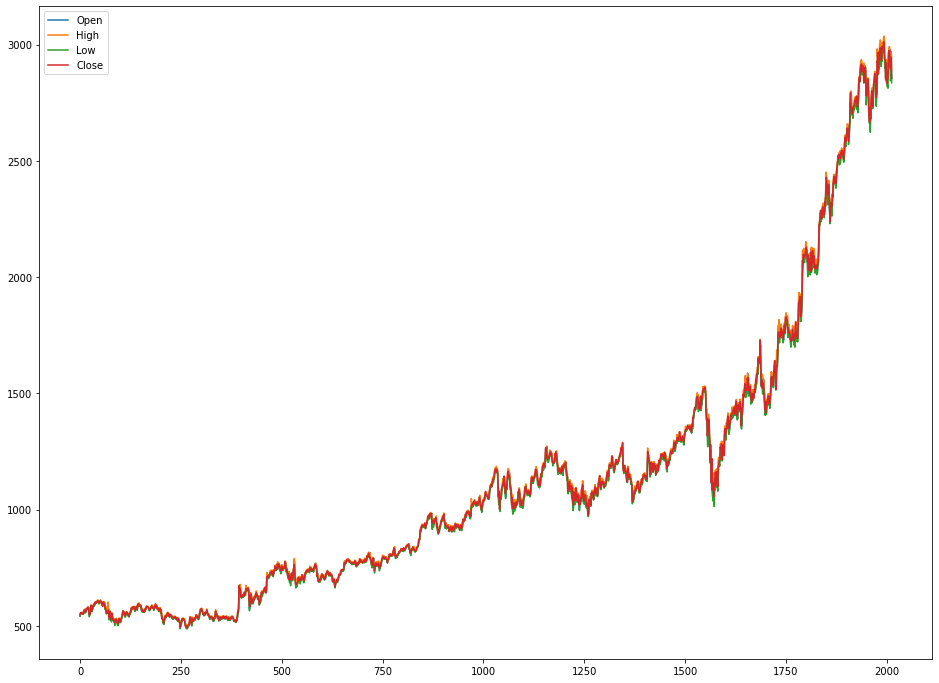

In [155]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))

linewidth=1.5
plt.plot(data['Open'], label='Open', linewidth=linewidth)
plt.plot(data['High'], label='High', linewidth=linewidth)
plt.plot(data['Low'], label='Low', linewidth=linewidth)
plt.plot(data['Close'], label='Close', linewidth=linewidth)

plt.legend()
plt.show()

In [156]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,date_obj,year,month,day
0,2013-12-20,542.117981,548.528992,541.968567,548.255005,548.255005,6547651,2013-12-20,2013,12,20
1,2013-12-23,551.851501,555.816650,550.496582,555.467957,555.467957,3456106,2013-12-23,2013,12,23
2,2013-12-24,555.403198,555.537720,551.981018,553.844055,553.844055,1473904,2013-12-24,2013,12,24
3,2013-12-26,554.924988,557.410706,552.274963,556.643555,556.643555,2685629,2013-12-26,2013,12,26
4,2013-12-27,557.908813,558.048279,554.392029,557.111816,557.111816,3151167,2013-12-27,2013,12,27
...,...,...,...,...,...,...,...,...,...,...,...
2008,2021-12-13,2968.879883,2971.250000,2927.199951,2934.090088,2934.090088,1205200,2021-12-13,2021,12,13
2009,2021-12-14,2895.399902,2908.840088,2844.850098,2899.409912,2899.409912,1238900,2021-12-14,2021,12,14
2010,2021-12-15,2887.320068,2950.344971,2854.110107,2947.370117,2947.370117,1364000,2021-12-15,2021,12,15
2011,2021-12-16,2961.540039,2971.030029,2881.850098,2896.770020,2896.770020,1370000,2021-12-16,2021,12,16


In [157]:
del data['date_obj']
del data['Date']

In [158]:
for c in data.columns:
    mean = data[c].mean()
    stdev = data[c].std()

    data[c] = (data[c] - mean) / stdev

In [159]:
target_sensor = "Close"
features = list(data.columns.difference([target_sensor]))
features

['Adj Close', 'High', 'Low', 'Open', 'Volume', 'day', 'month', 'year']

In [160]:
X = data[features]
y = data['Close']

In [161]:
test_size = 30
train_size = 2013 - test_size 

X_train = X[:train_size]
y_train = y[:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

In [162]:
import torch
from torch.utils.data import Dataset

class CandleDataset(Dataset):
    def __init__(self, X, y, sequence_length=30):
        self.sequence_length = sequence_length
        self.y = torch.tensor(y.values).float()
        self.X = torch.tensor(X.values).float()

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, i): 
        if i >= self.sequence_length - 1:
            i_start = i - self.sequence_length + 1
            x = self.X[i_start:(i + 1), :]
        else:
            padding = self.X[0].repeat(self.sequence_length - i - 1, 1)
            x = self.X[0:(i + 1), :]
            x = torch.cat((padding, x), 0)
        # x = self.X[i, :]

        return x, self.y[i]

In [163]:
from torch.utils.data import DataLoader

batch_size = 1

train_dataset = CandleDataset(
    X_train,
    y_train,
)
test_dataset = CandleDataset(
    X_test,
    y_test,
)


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [164]:
from torch import nn

class RegressionGRU(nn.Module):
    def __init__(self, num_sensors, hidden_units):
        super().__init__()
        self.num_sensors = num_sensors
        self.hidden_units = hidden_units
        self.num_layers = 2

        self.gru = nn.GRU(
            input_size=num_sensors,
            hidden_size=hidden_units,
            batch_first=True,
            num_layers=self.num_layers
        )

        self.linear = nn.Linear(in_features=self.hidden_units, out_features=1)

    def forward(self, x):
        batch_size = x.shape[0]

        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()

        out, _ = self.gru(x, h0.detach())
        out = out[:, -1, :]

        out = self.linear(out)

        return out

In [165]:
learning_rate = 5e-5
num_hidden_units = 128

model = RegressionGRU(num_sensors=len(features), hidden_units=num_hidden_units)
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [166]:
def train_model(data_loader, model, loss_function, optimizer):
    num_batches = len(data_loader)
    total_loss = 0
    model.train()

    for X, y in data_loader:
        # print(X)
        output = model(X)
        loss = loss_function(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / num_batches
    print(f"Train loss: {avg_loss}")
    
    return avg_loss

def test_model(data_loader, model, loss_function):

    num_batches = len(data_loader)
    total_loss = 0

    model.eval()
    with torch.no_grad():
        for X, y in data_loader:
            output = model(X)
            total_loss += loss_function(output, y).item()

    avg_loss = total_loss / num_batches
    print(f"Test loss: {avg_loss}")

    return avg_loss

In [167]:
print("Untrained test\n--------")
test_model(test_loader, model, loss_function)
print()

train_losses = []
test_losses = []
for ix_epoch in range(25):
    print(f"Epoch {ix_epoch}\n---------")
    train_losses.append(train_model(train_loader, model, loss_function, optimizer=optimizer))
    test_losses.append(test_model(test_loader, model, loss_function))
    print()

Untrained test
--------
Test loss: 7.978802061080932

Epoch 0
---------


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Train loss: 0.08245262188222632
Test loss: 0.029015711932288468

Epoch 1
---------
Train loss: 0.0032490170262633226
Test loss: 0.0218014941950211

Epoch 2
---------
Train loss: 0.0022017758933021267
Test loss: 0.04198013339967777

Epoch 3
---------
Train loss: 0.0017876958735658763
Test loss: 0.006616681864640365

Epoch 4
---------
Train loss: 0.0014019509232404738
Test loss: 0.00357418190142198

Epoch 5
---------
Train loss: 0.0011346246945241208
Test loss: 0.00652357204138904

Epoch 6
---------
Train loss: 0.0010010006294561536
Test loss: 0.004806978950576498

Epoch 7
---------
Train loss: 0.0009012045809299255
Test loss: 0.0034220867751476665

Epoch 8
---------
Train loss: 0.0007847872410356034
Test loss: 0.002289563750294595

Epoch 9
---------
Train loss: 0.0007016474545670024
Test loss: 0.002607622817959054

Epoch 10
---------
Train loss: 0.0005981266233202545
Test loss: 0.0021992449339146938

Epoch 11
---------
Train loss: 0.0005658822353000395
Test loss: 0.0027735920978860427



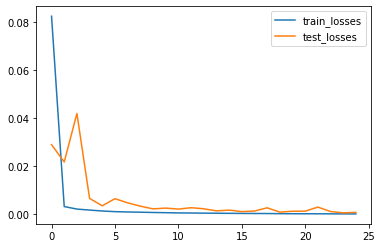

In [168]:
import matplotlib.pyplot as plt

linewidth=1.5
plt.plot(train_losses, label='train_losses', linewidth=linewidth)
plt.plot(test_losses, label='test_losses', linewidth=linewidth)

plt.legend()
plt.show()

In [169]:
def predict(data_loader, model):

    output = torch.tensor([])
    model.eval()
    with torch.no_grad():
        for X, _ in data_loader:
            y_star = model(X)
            output = torch.cat((output, y_star), 0)

    return output

In [170]:
test_pred = predict(test_loader, model).numpy()

In [171]:
test_pred

array([[3.0394576],
       [3.0559509],
       [3.038063 ],
       [2.9694567],
       [2.982587 ],
       [3.0271022],
       [3.0578685],
       [3.0452888],
       [3.0470035],
       [3.0807774],
       [3.0916276],
       [3.023758 ],
       [2.9730914],
       [2.9655838],
       [2.8780117],
       [2.9390266],
       [2.8698192],
       [2.840647 ],
       [2.8457842],
       [2.8545594],
       [2.8560398],
       [2.9799745],
       [3.0133388],
       [3.0125172],
       [3.0219257],
       [2.9846904],
       [2.8934357],
       [2.9383376],
       [2.9432242],
       [2.8420253]], dtype=float32)

In [172]:
preds =  list(predict(test_loader, model).numpy())

In [173]:
ys =  list(y_test.values)

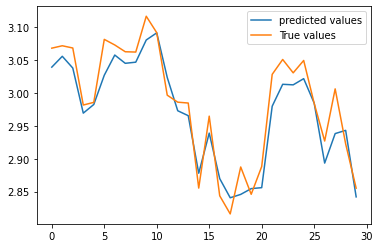

In [174]:
import matplotlib.pyplot as plt

linewidth=1.5
plt.plot(preds, label='predicted values', linewidth=linewidth)
plt.plot(ys, label='True values', linewidth=linewidth)

plt.legend()
plt.show()